# Homework ada6

### TMI M1 37-176839 Koichiro Tamura

### homework1

相補性条件
$$\alpha_{i} (y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i}) = 0$$

$$\beta_{i}\xi_{i} = 0$$

より，以下の性質を示せ

1. $$\alpha_{i} = 0 \Longrightarrow y_{i}\mathbf{w}^T \mathbf{x_{i}} \ge 1$$

1. $$0 < \alpha_{i} <  C  \Longrightarrow y_{i}\mathbf{w}^T \mathbf{x_{i}} =1$$

1. $$\alpha_{i} = C \Longrightarrow y_{i}\mathbf{w}^T \mathbf{x_{i}} \le 1 $$

1. $$y_{i}\mathbf{w}^T \mathbf{x_{i}} > 1\Longrightarrow \alpha_{i} = 0$$

1. $$y_{i}\mathbf{w}^T \mathbf{x_{i}} < 1\Longrightarrow \alpha_{i} = C$$ 

### answer

1:  
$\alpha_{i}=0$の時，
$$\beta_{i} = C$$


$\beta_{i}\xi_{i} = 0$より

$$\xi_{i} = 0$$

この時， $y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i} \ge 0$において
$$y_{i}\mathbf{w}^T \mathbf{x_{i}} \ge 1 $$

<div style="text-align: right;">
【Q.E.D】
</div>

======================================================================================================

2:

$0 < \alpha_{i} <  C$の時， $\alpha_{i} + \beta_{i} = C$から，
$$0 < \beta_{i} <  C$$
よって
$$\xi_{i} = 0$$

$\xi_{i} = 0$, $0 < \alpha_{i} <  C$と相補性条件
$$\alpha_{i} (y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i}) = 0$$
より，
$$(y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1) = 0$$
$$\therefore y_{i}\mathbf{w}^T \mathbf{x_{i}} = 1$$

<div style="text-align: right;">
【Q.E.D】
</div>

======================================================================================================

3.

$\alpha_{i} = C$の時，$\alpha_{i} + \beta_{i} = C$から，
$$\beta_{i} = 0$$


 $ \alpha_{i} =C$と相補性条件
$$\alpha_{i} (y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i}) = 0$$
より，
$$(y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1+\xi_{i}) = 0$$
$$\therefore y_{i}\mathbf{w}^T \mathbf{x_{i}} = 1-\xi_{i}$$

$\xi_{i} \ge 0$より
$$\alpha_{i} = C \Longrightarrow y_{i}\mathbf{w}^T \mathbf{x_{i}} \le 1 $$

<div style="text-align: right;">
【Q.E.D】
</div>

======================================================================================================

4.

$y_{i}\mathbf{w}^T \mathbf{x_{i}} > 1$の時，
$$y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i}> \xi_{i}$$
$\xi_{i} \ge 0$より，
$$y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i}> 0$$

相補性条件
$$\alpha_{i} (y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i}) = 0$$
より，
$$\alpha_{i} = 0$$

<div style="text-align: right;">
【Q.E.D】
</div>

======================================================================================================

5.

$y_{i}\mathbf{w}^T \mathbf{x_{i}} < 1$の時，
$$y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i}< \xi_{i}$$
$i) \alpha_{i} > 0$の時，
$$\alpha_{i} (y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i}) < \alpha_{i} \xi_{i}$$
相補性条件
$$\alpha_{i} (y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i}) = 0$$
より，
$$0 < \alpha_{i} \xi_{i}$$
$\alpha_{i} > 0$なので
$$\xi_{i} > 0$$

$\beta_{i}\xi_{i}=0$より，
$$\beta_{i} = 0$$

$\alpha_{i} + \beta_{i} = C$から，
$$\alpha_{i} = C$$


$ii) \alpha_{i} = 0$の時，
$\alpha_{i} + \beta_{i} = C$から，
$$\beta_{i}=C$$
この時，$\beta_{i}\xi_{i} = 0$より
$$\xi_{i} = 0$$
これと$y_{i}\mathbf{w}^T \mathbf{x_{i}} - 1 + \xi_{i} \ge 0$より，
$$y_{i}\mathbf{w}^T \mathbf{x_{i}} \ge 1$$
しかし，これは所与の条件に矛盾。

以上$i), ii)$より，
$$y_{i}\mathbf{w}^T \mathbf{x_{i}} < 1\Longrightarrow \alpha_{i} = C$$ 

<div style="text-align: right;">
【Q.E.D】
</div>

### homework2

線形モデル
$$f_{\mathbf{w}, b}(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b$$
に対するサポートベクターマシンの劣勾配アルゴリズムを実装せよ

### answer

In [125]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

#### サンプルデータ 

In [107]:
# X
x_1 = np.random.normal(0,1, size=[100,2])
x_1[:, 0] -= 5
x_1[0:6,0] +=8
x_1[0:6,1] +=3
x_2 = np.random.normal(0,1, size=[100,2])
x_2[:, 0] += 5
x_2[0:6, 0] -=8
x_2[0:6, 1] -=3

X = np.concatenate([x_1, x_2])

# Y 

t = []
for i in range(100):
    t.append(1.0)   # クラス1
for i in range(100):
    t.append(-1.0)  # クラス2
y = np.array(t)

/Users/tamurakouichirou/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


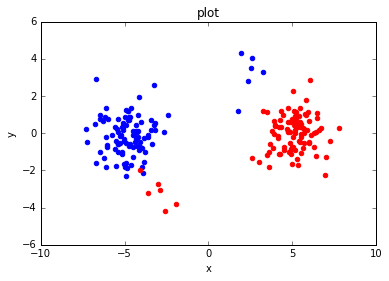

In [108]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(x_1[:,0],x_1[:,1], color="b")
ax.scatter(x_2[:,0],x_2[:,1], color="r")
ax.set_title('plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()

In [155]:
class SVM:
    def __init__(self, h=0.3, _lambda=0.1):
        # hyperparameter 
        self.h = h
        self._lambda = _lambda
        self.LR = 0.05
        self.C = float("inf")
        self.CountMax = 1000   
        self.count = 0
        
    def function(self, x1):
        """
        function of border
        b=w[2]に対応している
        """
        return  (self.w[0] / self.w[1]) * x1 + (self.w[2] / self.w[1])

    def kernel(self, x, c):
        """kernel function"""
        return math.exp(-1*np.power(x-c, 2).sum()) / (2*self.h**2)

    def dL(self, i):
        ans = 0
        for j in range(0,self.N):
            ans += self.L[j] * self.t[i] * self.t[j] * self.kernel(self.X[i], self.X[j])
        return (1 - ans)

    def train(self, X, y):
        self.t = y
        self.X = X
        # bの項を追加(Xに畳み込む)
        self.X = np.c_[self.X, np.ones(X.shape[0])]
        self.N = X.shape[0]
        
        # データの個数分のラグランジュ乗数を用意
        self.L = np.zeros((self.N,1))            
        
        # ラグランジュ未定乗数法を劣勾配で実現
        while (self.count < self.CountMax):
            for i in range(self.N):
                self.L[i] = self.L[i] + self.LR * self.dL(i)    # ラグランジュ乗数の更新
                if (self.L[i] < 0):
                    self.L[i] = 0
                elif (self.L[i] > self.C):
                    self.L[i] = self.C
            self.count += 1
            
        # ラグランジュ未定乗数法によって， マージンを最大にするa_{i}=L_{i}がもとまった
    
        
        # サポートベクトルのインデックスを抽出
        # 十分小さなa_{i}については無視できる
        self.S = []
        for i in range(len(self.L)):
            if self.L[i] < 0.00001: continue
            self.S.append(i)

        # wを計算
        self.w = np.dot(self.X.T, self.t*self.L)
        

In [156]:
model = SVM()
model.train(X, y)

/Users/tamurakouichirou/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


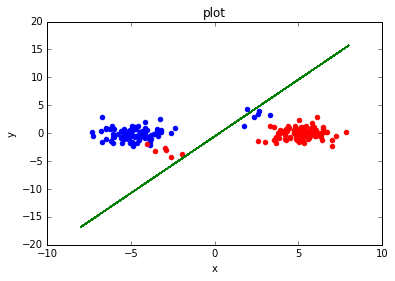

In [157]:
# 識別境界を描画
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(x_1[:,0],x_1[:,1], color="b")
ax.scatter(x_2[:,0],x_2[:,1], color="r")
ax.set_title('plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

x1 = np.linspace(-8, 8, 1000)
x2 = [model.function(x) for x in x1]
plt.plot(x1, x2, 'g-')

fig.show()